In [3]:
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import pycaret
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # For scaling
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  # For encoding categorical data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("finalgemastik/train.csv")
df.head()

,id,Pendapatan Keluarga,Jumlah Tanggungan dalam Keluarga,Pekerjaan Orang Tua/Wali,Pendidikan Orang Tua/Wali,Kepemilikan Aset,Lokasi Tempat Tinggal,Pengeluaran Bulanan Keluarga,Status Kepesertaan Program Bantuan Pemerintah,Riwayat Beasiswa atau Bantuan Pendidikan,...,Bahan Atap Rumah,Bahan Tembok Rumah,Bahan Lantai Rumah,Rerata Pengeluaran Listrik & Air per Bulan,Total Hutang,Cicilan Hutang per Bulan,Program Studi,Kota,Jalur Masuk,Golongan UKT
0,127748,Rp 1.000.000 s.d. Rp 2.000.000,2.0,Tidak Bekerja,SLTA Sederajat,Milik Sendiri,Kab. Sragen,500000.0,KIS/JKS/BPJS,KIPK,...,genting,semen,keramik,450000.0,0.0,0.0,Ilmu Politik,Kab. Sragen,SNBT,0.0
1,90205,lebih dari Rp 5.000.000,2.0,Buruh,SLTA Sederajat,Milik Sendiri,Kabupaten Tangerang,3500000.0,KIS/JKS/BPJS,Tidak Ada,...,Genteng,Batako Plester,Keramik,320000.0,45000000.0,4500000.0,Geografi,Kabupaten Tangerang,SNBP,3.0
2,82795,Rp 3.000.000 s.d. Rp 4.000.000,2.0,Wiraswasta,SD,Milik Sendiri,Kabupaten Grobogan,600000.0,KIS/JKS/BPJS,Tidak,...,Genting,Batu Bata,Keramik,NaN,0.0,0.0,Ilmu Politik,Kabupaten Grobogan,SNBT,4.0
3,108947,lebih dari Rp 5.000.000,2.0,Wiraswasta,SLTP,Milik Sendiri,Kab. Bogor,2250000.0,KIS/JKS/BPJS,Tidak Dapat,...,Kayu dan asbes,Bata merah dan hebel,Keramik,500000.0,0.0,0.0,Pendidikan Ekonomi,Kab. Bogor,SNBT,5.0
4,89985,Rp 3.000.000 s.d. Rp 4.000.000,NaN,Wiraswasta,MTs,Milik Sendiri,Kabupaten Pemalang,2310000.0,KIS/JKS/BPJS,Tidak Dapat,...,"Genting tanah liat, asbes, dan seng.",Batu bata,"Keramik, tegel, plester.",105000.0,5000000.0,500000.0,Pendidikan Teknik Elektro,Kabupaten Pemalang,SNBP,3.0


In [4]:
# Mengatur tampilan untuk menampilkan semua kolom
pd.set_option('display.max_columns', None)

# Menampilkan nama seluruh kolom
print(df.columns.tolist())

['id', 'Pendapatan Keluarga', 'Jumlah Tanggungan dalam Keluarga', 'Pekerjaan Orang Tua/Wali', 'Pendidikan Orang Tua/Wali', 'Kepemilikan Aset', 'Lokasi Tempat Tinggal', 'Pengeluaran Bulanan Keluarga', 'Status Kepesertaan Program Bantuan Pemerintah', 'Riwayat Beasiswa atau Bantuan Pendidikan', 'Ayah Hidup?', 'Ibu Hidup?', 'Status Kepemilikan Tempat Tinggal', 'Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki', 'Daya Listrik (Watt)', 'Luas Tanah Rumah (m2)', 'Luas Bangunan Rumah (m2)', 'NJOP per Meter', 'Bahan Atap Rumah', 'Bahan Tembok Rumah', 'Bahan Lantai Rumah', 'Rerata Pengeluaran Listrik & Air per Bulan', 'Total Hutang', 'Cicilan Hutang per Bulan', 'Program Studi', 'Kota', 'Jalur Masuk', 'Golongan UKT']


In [31]:
df

,id,Pendapatan Keluarga,Jumlah Tanggungan dalam Keluarga,Pekerjaan Orang Tua/Wali,Pendidikan Orang Tua/Wali,Kepemilikan Aset,Lokasi Tempat Tinggal,Pengeluaran Bulanan Keluarga,Status Kepesertaan Program Bantuan Pemerintah,Riwayat Beasiswa atau Bantuan Pendidikan,Ayah Hidup?,Ibu Hidup?,Status Kepemilikan Tempat Tinggal,Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki,Daya Listrik (Watt),Luas Tanah Rumah (m2),Luas Bangunan Rumah (m2),NJOP per Meter,Bahan Atap Rumah,Bahan Tembok Rumah,Bahan Lantai Rumah,Rerata Pengeluaran Listrik & Air per Bulan,Total Hutang,Cicilan Hutang per Bulan,Program Studi,Kota,Jalur Masuk,Golongan UKT,Pendapatan Keluarga Encode
0,127748,Rp 1.000.000 s.d. Rp 2.000.000,2.0,Tidak Bekerja,SLTA Sederajat,Milik Sendiri,Kab. Sragen,500000.0,KIS/JKS/BPJS,KIPK,Meninggal,Hidup,Milik Sendiri,2.0,900.0,144.0,126.0,103.0,genting,semen,keramik,450000.0,0.0,0.0,Ilmu Politik,Kab. Sragen,SNBT,0.0,2.0
1,90205,lebih dari Rp 5.000.000,2.0,Buruh,SLTA Sederajat,Milik Sendiri,Kabupaten Tangerang,3500000.0,KIS/JKS/BPJS,Tidak Ada,Hidup,Hidup,Milik Sendiri,6500000.0,900.0,60.0,22.0,128.0,Genteng,Batako Plester,Keramik,320000.0,45000000.0,4500000.0,Geografi,Kabupaten Tangerang,SNBP,3.0,6.0
2,82795,Rp 3.000.000 s.d. Rp 4.000.000,2.0,Wiraswasta,SD,Milik Sendiri,Kabupaten Grobogan,600000.0,KIS/JKS/BPJS,Tidak,Hidup,Hidup,Milik Sendiri,20000000.0,450.0,586.0,65.0,128000.0,Genting,Batu Bata,Keramik,NaN,0.0,0.0,Ilmu Politik,Kabupaten Grobogan,SNBT,4.0,4.0
3,108947,lebih dari Rp 5.000.000,2.0,Wiraswasta,SLTP,Milik Sendiri,Kab. Bogor,2250000.0,KIS/JKS/BPJS,Tidak Dapat,Hidup,Hidup,Milik Sendiri,8000000.0,900.0,93.0,70.0,2176000.0,Kayu dan asbes,Bata merah dan hebel,Keramik,500000.0,0.0,0.0,Pendidikan Ekonomi,Kab. Bogor,SNBT,5.0,6.0
4,89985,Rp 3.000.000 s.d. Rp 4.000.000,NaN,Wiraswasta,MTs,Milik Sendiri,Kabupaten Pemalang,2310000.0,KIS/JKS/BPJS,Tidak Dapat,Hidup,Hidup,Milik Sendiri,1000000.0,900.0,0.0,57.0,0.0,"Genting tanah liat, asbes, dan seng.",Batu bata,"Keramik, tegel, plester.",105000.0,5000000.0,500000.0,Pendidikan Teknik Elektro,Kabupaten Pemalang,SNBP,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30375,147514,Rp 1.000.000 s.d. Rp 2.000.000,0.0,Buruh,SLTA,Menumpang,Kab. Boyolali,500000.0,KIS/JKS/BPJS,kipk,Hidup,Hidup,Menumpang,18000000.0,900.0,2700.0,90.0,160000.0,Genting,Batu bata/ bata merah,Plaster,60000.0,26000000.0,1447000.0,Geografi,Kab. Boyolali,SNBP,0.0,2.0
30376,62832,"kurang dari Rp 1.000.000,-",0.0,Buruh,MI,Milik Sendiri,Kabupaten Kudus,600000.0,NaN,KIPK,Hidup,Hidup,Milik Sendiri,1000000.0,450.0,142.0,42.0,36000.0,Genting,Semen,Batu bata,62084.0,2000000.0,160000.0,Pendidikan Bahasa Perancis,Kabupaten Kudus,SNBP,0.0,1.0
30377,88943,"kurang dari Rp 1.000.000,-",3.0,Petani,SLTA Sederajat,Milik Sendiri,Kabupaten Tuban,450000.0,KIS/JKS/BPJS,kipk,Hidup,Hidup,Milik Sendiri,3000000.0,450.0,450.0,40.0,20000.0,Genting tanah liat,Kayu,Tanah,0.0,0.0,0.0,Pendidikan Fisika,Kabupaten Tuban,SNBP,0.0,1.0
30378,149599,"kurang dari Rp 1.000.000,-",1.0,Buruh,SMP,Milik Sendiri,Kab. Pekalongan,450000.0,KIS/JKS/BPJS,KIPK,Hidup,Meninggal,Milik Sendiri,6000000.0,450.0,310.0,40.0,64000.0,Genteng,Batu bata,Keramik dan tanah,68500.0,0.0,0.0,Pendidikan Guru Sekolah Dasar,Kab. Pekalongan,SNBT,0.0,1.0


In [13]:
df.isnull().sum()

id                                                           0
Pendapatan Keluarga                                        212
Jumlah Tanggungan dalam Keluarga                           220
Pekerjaan Orang Tua/Wali                                   194
Pendidikan Orang Tua/Wali                                  200
Kepemilikan Aset                                           207
Lokasi Tempat Tinggal                                      143
Pengeluaran Bulanan Keluarga                               221
Status Kepesertaan Program Bantuan Pemerintah             4988
Riwayat Beasiswa atau Bantuan Pendidikan                     0
Ayah Hidup?                                                212
Ibu Hidup?                                                 192
Status Kepemilikan Tempat Tinggal                          214
Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki     276
Daya Listrik (Watt)                                        214
Luas Tanah Rumah (m2)                                  

In [10]:
df.isnull().mean() * 100

id                                                         0.000000
Pendapatan Keluarga                                        0.697828
Jumlah Tanggungan dalam Keluarga                           0.724161
Pekerjaan Orang Tua/Wali                                   0.638578
Pendidikan Orang Tua/Wali                                  0.658328
Kepemilikan Aset                                           0.681369
Lokasi Tempat Tinggal                                      0.470704
Pengeluaran Bulanan Keluarga                               0.727452
Status Kepesertaan Program Bantuan Pemerintah             16.418697
Riwayat Beasiswa atau Bantuan Pendidikan                   0.000000
Ayah Hidup?                                                0.697828
Ibu Hidup?                                                 0.631995
Status Kepemilikan Tempat Tinggal                          0.704411
Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki     0.908492
Daya Listrik (Watt)                             

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30380 entries, 0 to 30379
Data columns (total 28 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   id                                                      30380 non-null  int64  
 1   Pendapatan Keluarga                                     30168 non-null  object 
 2   Jumlah Tanggungan dalam Keluarga                        30160 non-null  float64
 3   Pekerjaan Orang Tua/Wali                                30186 non-null  object 
 4   Pendidikan Orang Tua/Wali                               30180 non-null  object 
 5   Kepemilikan Aset                                        30173 non-null  object 
 6   Lokasi Tempat Tinggal                                   30237 non-null  object 
 7   Pengeluaran Bulanan Keluarga                            30159 non-null  float64
 8   Status Kepesertaan Program Bantuan P

In [15]:
df.nunique()

id                                                        30380
Pendapatan Keluarga                                           6
Jumlah Tanggungan dalam Keluarga                             15
Pekerjaan Orang Tua/Wali                                      7
Pendidikan Orang Tua/Wali                                    27
Kepemilikan Aset                                              3
Lokasi Tempat Tinggal                                       641
Pengeluaran Bulanan Keluarga                               1124
Status Kepesertaan Program Bantuan Pemerintah                 1
Riwayat Beasiswa atau Bantuan Pendidikan                      6
Ayah Hidup?                                                   2
Ibu Hidup?                                                    2
Status Kepemilikan Tempat Tinggal                             3
Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki     1135
Daya Listrik (Watt)                                         200
Luas Tanah Rumah (m2)                   

In [21]:
df["Pendapatan Keluarga"].unique()

array(['Rp 1.000.000 s.d. Rp 2.000.000', 'lebih dari Rp 5.000.000',
       'Rp 3.000.000 s.d. Rp 4.000.000', 'Rp 2.000.000 s.d. Rp 3.000.000',
       'kurang dari Rp 1.000.000,-', 'Rp 4.000.000 s.d. Rp 5.000.000',
       nan], dtype=object)

In [27]:
# Tentukan urutan ukuran secara manual
Pendapatan_Keluarga = {'kurang dari Rp 1.000.000,-': 1, 'Rp 1.000.000 s.d. Rp 2.000.000': 2, 'Rp 2.000.000 s.d. Rp 3.000.000': 3, 'Rp 3.000.000 s.d. Rp 4.000.000': 4, 'Rp 4.000.000 s.d. Rp 5.000.000': 5,  'lebih dari Rp 5.000.000': 6}

# Terapkan encoding berdasarkan urutan
df['Pendapatan Keluarga Encode'] = df['Pendapatan Keluarga'].map(Pendapatan_Keluarga)

In [28]:
df

,id,Pendapatan Keluarga,Jumlah Tanggungan dalam Keluarga,Pekerjaan Orang Tua/Wali,Pendidikan Orang Tua/Wali,Kepemilikan Aset,Lokasi Tempat Tinggal,Pengeluaran Bulanan Keluarga,Status Kepesertaan Program Bantuan Pemerintah,Riwayat Beasiswa atau Bantuan Pendidikan,Ayah Hidup?,Ibu Hidup?,Status Kepemilikan Tempat Tinggal,Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki,Daya Listrik (Watt),Luas Tanah Rumah (m2),Luas Bangunan Rumah (m2),NJOP per Meter,Bahan Atap Rumah,Bahan Tembok Rumah,Bahan Lantai Rumah,Rerata Pengeluaran Listrik & Air per Bulan,Total Hutang,Cicilan Hutang per Bulan,Program Studi,Kota,Jalur Masuk,Golongan UKT,Pendapatan Keluarga Encode
0,127748,Rp 1.000.000 s.d. Rp 2.000.000,2.0,Tidak Bekerja,SLTA Sederajat,Milik Sendiri,Kab. Sragen,500000.0,KIS/JKS/BPJS,KIPK,Meninggal,Hidup,Milik Sendiri,2.0,900.0,144.0,126.0,103.0,genting,semen,keramik,450000.0,0.0,0.0,Ilmu Politik,Kab. Sragen,SNBT,0.0,2.0
1,90205,lebih dari Rp 5.000.000,2.0,Buruh,SLTA Sederajat,Milik Sendiri,Kabupaten Tangerang,3500000.0,KIS/JKS/BPJS,Tidak Ada,Hidup,Hidup,Milik Sendiri,6500000.0,900.0,60.0,22.0,128.0,Genteng,Batako Plester,Keramik,320000.0,45000000.0,4500000.0,Geografi,Kabupaten Tangerang,SNBP,3.0,6.0
2,82795,Rp 3.000.000 s.d. Rp 4.000.000,2.0,Wiraswasta,SD,Milik Sendiri,Kabupaten Grobogan,600000.0,KIS/JKS/BPJS,Tidak,Hidup,Hidup,Milik Sendiri,20000000.0,450.0,586.0,65.0,128000.0,Genting,Batu Bata,Keramik,NaN,0.0,0.0,Ilmu Politik,Kabupaten Grobogan,SNBT,4.0,4.0
3,108947,lebih dari Rp 5.000.000,2.0,Wiraswasta,SLTP,Milik Sendiri,Kab. Bogor,2250000.0,KIS/JKS/BPJS,Tidak Dapat,Hidup,Hidup,Milik Sendiri,8000000.0,900.0,93.0,70.0,2176000.0,Kayu dan asbes,Bata merah dan hebel,Keramik,500000.0,0.0,0.0,Pendidikan Ekonomi,Kab. Bogor,SNBT,5.0,6.0
4,89985,Rp 3.000.000 s.d. Rp 4.000.000,NaN,Wiraswasta,MTs,Milik Sendiri,Kabupaten Pemalang,2310000.0,KIS/JKS/BPJS,Tidak Dapat,Hidup,Hidup,Milik Sendiri,1000000.0,900.0,0.0,57.0,0.0,"Genting tanah liat, asbes, dan seng.",Batu bata,"Keramik, tegel, plester.",105000.0,5000000.0,500000.0,Pendidikan Teknik Elektro,Kabupaten Pemalang,SNBP,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30375,147514,Rp 1.000.000 s.d. Rp 2.000.000,0.0,Buruh,SLTA,Menumpang,Kab. Boyolali,500000.0,KIS/JKS/BPJS,kipk,Hidup,Hidup,Menumpang,18000000.0,900.0,2700.0,90.0,160000.0,Genting,Batu bata/ bata merah,Plaster,60000.0,26000000.0,1447000.0,Geografi,Kab. Boyolali,SNBP,0.0,2.0
30376,62832,"kurang dari Rp 1.000.000,-",0.0,Buruh,MI,Milik Sendiri,Kabupaten Kudus,600000.0,NaN,KIPK,Hidup,Hidup,Milik Sendiri,1000000.0,450.0,142.0,42.0,36000.0,Genting,Semen,Batu bata,62084.0,2000000.0,160000.0,Pendidikan Bahasa Perancis,Kabupaten Kudus,SNBP,0.0,1.0
30377,88943,"kurang dari Rp 1.000.000,-",3.0,Petani,SLTA Sederajat,Milik Sendiri,Kabupaten Tuban,450000.0,KIS/JKS/BPJS,kipk,Hidup,Hidup,Milik Sendiri,3000000.0,450.0,450.0,40.0,20000.0,Genting tanah liat,Kayu,Tanah,0.0,0.0,0.0,Pendidikan Fisika,Kabupaten Tuban,SNBP,0.0,1.0
30378,149599,"kurang dari Rp 1.000.000,-",1.0,Buruh,SMP,Milik Sendiri,Kab. Pekalongan,450000.0,KIS/JKS/BPJS,KIPK,Hidup,Meninggal,Milik Sendiri,6000000.0,450.0,310.0,40.0,64000.0,Genteng,Batu bata,Keramik dan tanah,68500.0,0.0,0.0,Pendidikan Guru Sekolah Dasar,Kab. Pekalongan,SNBT,0.0,1.0


In [32]:
df.drop(columns="Pendapatan Keluarga", inplace=True)

In [33]:
df

,id,Jumlah Tanggungan dalam Keluarga,Pekerjaan Orang Tua/Wali,Pendidikan Orang Tua/Wali,Kepemilikan Aset,Lokasi Tempat Tinggal,Pengeluaran Bulanan Keluarga,Status Kepesertaan Program Bantuan Pemerintah,Riwayat Beasiswa atau Bantuan Pendidikan,Ayah Hidup?,Ibu Hidup?,Status Kepemilikan Tempat Tinggal,Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki,Daya Listrik (Watt),Luas Tanah Rumah (m2),Luas Bangunan Rumah (m2),NJOP per Meter,Bahan Atap Rumah,Bahan Tembok Rumah,Bahan Lantai Rumah,Rerata Pengeluaran Listrik & Air per Bulan,Total Hutang,Cicilan Hutang per Bulan,Program Studi,Kota,Jalur Masuk,Golongan UKT,Pendapatan Keluarga Encode
0,127748,2.0,Tidak Bekerja,SLTA Sederajat,Milik Sendiri,Kab. Sragen,500000.0,KIS/JKS/BPJS,KIPK,Meninggal,Hidup,Milik Sendiri,2.0,900.0,144.0,126.0,103.0,genting,semen,keramik,450000.0,0.0,0.0,Ilmu Politik,Kab. Sragen,SNBT,0.0,2.0
1,90205,2.0,Buruh,SLTA Sederajat,Milik Sendiri,Kabupaten Tangerang,3500000.0,KIS/JKS/BPJS,Tidak Ada,Hidup,Hidup,Milik Sendiri,6500000.0,900.0,60.0,22.0,128.0,Genteng,Batako Plester,Keramik,320000.0,45000000.0,4500000.0,Geografi,Kabupaten Tangerang,SNBP,3.0,6.0
2,82795,2.0,Wiraswasta,SD,Milik Sendiri,Kabupaten Grobogan,600000.0,KIS/JKS/BPJS,Tidak,Hidup,Hidup,Milik Sendiri,20000000.0,450.0,586.0,65.0,128000.0,Genting,Batu Bata,Keramik,NaN,0.0,0.0,Ilmu Politik,Kabupaten Grobogan,SNBT,4.0,4.0
3,108947,2.0,Wiraswasta,SLTP,Milik Sendiri,Kab. Bogor,2250000.0,KIS/JKS/BPJS,Tidak Dapat,Hidup,Hidup,Milik Sendiri,8000000.0,900.0,93.0,70.0,2176000.0,Kayu dan asbes,Bata merah dan hebel,Keramik,500000.0,0.0,0.0,Pendidikan Ekonomi,Kab. Bogor,SNBT,5.0,6.0
4,89985,NaN,Wiraswasta,MTs,Milik Sendiri,Kabupaten Pemalang,2310000.0,KIS/JKS/BPJS,Tidak Dapat,Hidup,Hidup,Milik Sendiri,1000000.0,900.0,0.0,57.0,0.0,"Genting tanah liat, asbes, dan seng.",Batu bata,"Keramik, tegel, plester.",105000.0,5000000.0,500000.0,Pendidikan Teknik Elektro,Kabupaten Pemalang,SNBP,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30375,147514,0.0,Buruh,SLTA,Menumpang,Kab. Boyolali,500000.0,KIS/JKS/BPJS,kipk,Hidup,Hidup,Menumpang,18000000.0,900.0,2700.0,90.0,160000.0,Genting,Batu bata/ bata merah,Plaster,60000.0,26000000.0,1447000.0,Geografi,Kab. Boyolali,SNBP,0.0,2.0
30376,62832,0.0,Buruh,MI,Milik Sendiri,Kabupaten Kudus,600000.0,NaN,KIPK,Hidup,Hidup,Milik Sendiri,1000000.0,450.0,142.0,42.0,36000.0,Genting,Semen,Batu bata,62084.0,2000000.0,160000.0,Pendidikan Bahasa Perancis,Kabupaten Kudus,SNBP,0.0,1.0
30377,88943,3.0,Petani,SLTA Sederajat,Milik Sendiri,Kabupaten Tuban,450000.0,KIS/JKS/BPJS,kipk,Hidup,Hidup,Milik Sendiri,3000000.0,450.0,450.0,40.0,20000.0,Genting tanah liat,Kayu,Tanah,0.0,0.0,0.0,Pendidikan Fisika,Kabupaten Tuban,SNBP,0.0,1.0
30378,149599,1.0,Buruh,SMP,Milik Sendiri,Kab. Pekalongan,450000.0,KIS/JKS/BPJS,KIPK,Hidup,Meninggal,Milik Sendiri,6000000.0,450.0,310.0,40.0,64000.0,Genteng,Batu bata,Keramik dan tanah,68500.0,0.0,0.0,Pendidikan Guru Sekolah Dasar,Kab. Pekalongan,SNBT,0.0,1.0


In [34]:
df.isnull().sum()

id                                                           0
Jumlah Tanggungan dalam Keluarga                           220
Pekerjaan Orang Tua/Wali                                   194
Pendidikan Orang Tua/Wali                                  200
Kepemilikan Aset                                           207
Lokasi Tempat Tinggal                                      143
Pengeluaran Bulanan Keluarga                               221
Status Kepesertaan Program Bantuan Pemerintah             4988
Riwayat Beasiswa atau Bantuan Pendidikan                     0
Ayah Hidup?                                                212
Ibu Hidup?                                                 192
Status Kepemilikan Tempat Tinggal                          214
Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki     276
Daya Listrik (Watt)                                        214
Luas Tanah Rumah (m2)                                      219
Luas Bangunan Rumah (m2)                               

In [44]:
# Mengisi nilai hilang dengan modus kolom
df['Jumlah Tanggungan dalam Keluarga'] = df['Jumlah Tanggungan dalam Keluarga'].fillna(df['Jumlah Tanggungan dalam Keluarga'].mode()[0])
df['Pekerjaan Orang Tua/Wali'] = df['Pekerjaan Orang Tua/Wali'].fillna(df['Pekerjaan Orang Tua/Wali'].mode()[0])
df['Pendidikan Orang Tua/Wali'] = df['Pendidikan Orang Tua/Wali'].fillna(df['Pendidikan Orang Tua/Wali'].mode()[0])
df['Kepemilikan Aset'] = df['Kepemilikan Aset'].fillna(df['Kepemilikan Aset'].mode()[0])
df['Lokasi Tempat Tinggal'] = df['Lokasi Tempat Tinggal'].fillna(df['Lokasi Tempat Tinggal'].mode()[0])
df['Status Kepesertaan Program Bantuan Pemerintah'] = df['Status Kepesertaan Program Bantuan Pemerintah'].fillna(df['Status Kepesertaan Program Bantuan Pemerintah'].mode()[0])
df['Ayah Hidup?'] = df['Ayah Hidup?'].fillna(df['Ayah Hidup?'].mode()[0])
df['Ibu Hidup?'] = df['Ibu Hidup?'].fillna(df['Ibu Hidup?'].mode()[0])
df['Status Kepemilikan Tempat Tinggal'] = df['Status Kepemilikan Tempat Tinggal'].fillna(df['Status Kepemilikan Tempat Tinggal'].mode()[0])
df['Bahan Atap Rumah'] = df['Bahan Atap Rumah'].fillna(df['Bahan Atap Rumah'].mode()[0])
df['Bahan Tembok Rumah'] = df['Bahan Tembok Rumah'].fillna(df['Bahan Tembok Rumah'].mode()[0])
df['Bahan Lantai Rumah'] = df['Bahan Lantai Rumah'].fillna(df['Bahan Lantai Rumah'].mode()[0])
df['Program Studi'] = df['Program Studi'].fillna(df['Program Studi'].mode()[0])
df['Kota'] = df['Kota'].fillna(df['Kota'].mode()[0])
df['Jalur Masuk'] = df['Jalur Masuk'].fillna(df['Jalur Masuk'].mode()[0])
df['Pendapatan Keluarga Encode'] = df['Pendapatan Keluarga Encode'].fillna(df['Pendapatan Keluarga Encode'].mode()[0])

In [45]:
df.isna().sum()

id                                                          0
Jumlah Tanggungan dalam Keluarga                            0
Pekerjaan Orang Tua/Wali                                    0
Pendidikan Orang Tua/Wali                                   0
Kepemilikan Aset                                            0
Lokasi Tempat Tinggal                                       0
Pengeluaran Bulanan Keluarga                              221
Status Kepesertaan Program Bantuan Pemerintah               0
Riwayat Beasiswa atau Bantuan Pendidikan                    0
Ayah Hidup?                                                 0
Ibu Hidup?                                                  0
Status Kepemilikan Tempat Tinggal                           0
Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki    276
Daya Listrik (Watt)                                       214
Luas Tanah Rumah (m2)                                     219
Luas Bangunan Rumah (m2)                                  211
NJOP per

In [48]:
df['Pengeluaran Bulanan Keluarga'] = df['Pengeluaran Bulanan Keluarga'].fillna(df['Pengeluaran Bulanan Keluarga'].mean())
df['Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki'] = df['Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki'].fillna(df['Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki'].mean())
df['Daya Listrik (Watt)'] = df['Daya Listrik (Watt)'].fillna(df['Daya Listrik (Watt)'].mean())
df['Luas Tanah Rumah (m2)'] = df['Luas Tanah Rumah (m2)'].fillna(df['Luas Tanah Rumah (m2)'].mean())
df['Luas Bangunan Rumah (m2)'] = df['Luas Bangunan Rumah (m2)'].fillna(df['Luas Bangunan Rumah (m2)'].mean())
df['NJOP per Meter'] = df['NJOP per Meter'].fillna(df['NJOP per Meter'].mean())
df['Rerata Pengeluaran Listrik & Air per Bulan'] = df['Rerata Pengeluaran Listrik & Air per Bulan'].fillna(df['Rerata Pengeluaran Listrik & Air per Bulan'].mean())
df['Total Hutang'] = df['Total Hutang'].fillna(df['Total Hutang'].mean())
df['Cicilan Hutang per Bulan'] = df['Cicilan Hutang per Bulan'].fillna(df['Cicilan Hutang per Bulan'].mean())

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30380 entries, 0 to 30379
Data columns (total 28 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   id                                                      30380 non-null  int64  
 1   Jumlah Tanggungan dalam Keluarga                        30380 non-null  float64
 2   Pekerjaan Orang Tua/Wali                                30380 non-null  object 
 3   Pendidikan Orang Tua/Wali                               30380 non-null  object 
 4   Kepemilikan Aset                                        30380 non-null  object 
 5   Lokasi Tempat Tinggal                                   30380 non-null  object 
 6   Pengeluaran Bulanan Keluarga                            30159 non-null  float64
 7   Status Kepesertaan Program Bantuan Pemerintah           30380 non-null  object 
 8   Riwayat Beasiswa atau Bantuan Pendid

In [49]:
df.isna().sum()

id                                                        0
Jumlah Tanggungan dalam Keluarga                          0
Pekerjaan Orang Tua/Wali                                  0
Pendidikan Orang Tua/Wali                                 0
Kepemilikan Aset                                          0
Lokasi Tempat Tinggal                                     0
Pengeluaran Bulanan Keluarga                              0
Status Kepesertaan Program Bantuan Pemerintah             0
Riwayat Beasiswa atau Bantuan Pendidikan                  0
Ayah Hidup?                                               0
Ibu Hidup?                                                0
Status Kepemilikan Tempat Tinggal                         0
Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki    0
Daya Listrik (Watt)                                       0
Luas Tanah Rumah (m2)                                     0
Luas Bangunan Rumah (m2)                                  0
NJOP per Meter                          

In [61]:
df.head(20)

,id,Jumlah Tanggungan dalam Keluarga,Pekerjaan Orang Tua/Wali,Pendidikan Orang Tua/Wali,Kepemilikan Aset,Lokasi Tempat Tinggal,Pengeluaran Bulanan Keluarga,Riwayat Beasiswa atau Bantuan Pendidikan,Ayah Hidup?,Ibu Hidup?,Status Kepemilikan Tempat Tinggal,Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki,Daya Listrik (Watt),Luas Tanah Rumah (m2),Luas Bangunan Rumah (m2),NJOP per Meter,Bahan Atap Rumah,Bahan Tembok Rumah,Bahan Lantai Rumah,Rerata Pengeluaran Listrik & Air per Bulan,Total Hutang,Cicilan Hutang per Bulan,Program Studi,Kota,Jalur Masuk,Golongan UKT,Pendapatan Keluarga Encode
0,127748,2.0,Tidak Bekerja,SLTA Sederajat,Milik Sendiri,Kab. Sragen,500000.0,KIPK,Meninggal,Hidup,Milik Sendiri,2.0,900.0,144.0,126.000000,103.0,genting,semen,keramik,450000.000000,0.0,0.0,Ilmu Politik,Kab. Sragen,SNBT,0.0,2.0
1,90205,2.0,Buruh,SLTA Sederajat,Milik Sendiri,Kabupaten Tangerang,3500000.0,Tidak Ada,Hidup,Hidup,Milik Sendiri,6500000.0,900.0,60.0,22.000000,128.0,Genteng,Batako Plester,Keramik,320000.000000,45000000.0,4500000.0,Geografi,Kabupaten Tangerang,SNBP,3.0,6.0
2,82795,2.0,Wiraswasta,SD,Milik Sendiri,Kabupaten Grobogan,600000.0,Tidak,Hidup,Hidup,Milik Sendiri,20000000.0,450.0,586.0,65.000000,128000.0,Genting,Batu Bata,Keramik,425275.114326,0.0,0.0,Ilmu Politik,Kabupaten Grobogan,SNBT,4.0,4.0
3,108947,2.0,Wiraswasta,SLTP,Milik Sendiri,Kab. Bogor,2250000.0,Tidak Dapat,Hidup,Hidup,Milik Sendiri,8000000.0,900.0,93.0,70.000000,2176000.0,Kayu dan asbes,Bata merah dan hebel,Keramik,500000.000000,0.0,0.0,Pendidikan Ekonomi,Kab. Bogor,SNBT,5.0,6.0
4,89985,1.0,Wiraswasta,MTs,Milik Sendiri,Kabupaten Pemalang,2310000.0,Tidak Dapat,Hidup,Hidup,Milik Sendiri,1000000.0,900.0,0.0,57.000000,0.0,"Genting tanah liat, asbes, dan seng.",Batu bata,"Keramik, tegel, plester.",105000.000000,5000000.0,500000.0,Pendidikan Teknik Elektro,Kabupaten Pemalang,SNBP,3.0,4.0
5,89757,0.0,Tidak Bekerja,MTs,Menumpang,Kabupaten Lahat,700000.0,kipk,Hidup,Hidup,Menumpang,16000000.0,900.0,65.0,54.000000,5330.0,SENG,Batu Bata,Keramik Biasa,300000.000000,0.0,0.0,Teknik Mesin,Kabupaten Lahat,SNBP,0.0,2.0
6,62526,3.0,Buruh,MA,Milik Sendiri,Kota Semarang,500000.0,-,Hidup,Hidup,Milik Sendiri,5000000.0,900.0,259.0,48.000000,1722000.0,Genting tanah liat,Batu Bata,Keramik,110000.000000,2000000.0,10000.0,Pendidikan Ekonomi,Kota Semarang,SNBP,2.0,2.0
7,91185,2.0,Wiraswasta,S-1/D4,Milik Sendiri,Kota Semarang,2700000.0,-,Hidup,Hidup,Milik Sendiri,0.0,1300.0,200.0,120.000000,0.0,asbes,batako,keramik,265000.000000,0.0,0.0,Pendidikan Guru Pendidikan Anak Usia Dini,Kota Semarang,SNBP,4.0,4.0
8,61407,1.0,Buruh,SLTA Sederajat,Milik Sendiri,Kota Semarang,2000000.0,Tidak Ada,Hidup,Hidup,Milik Sendiri,98000000.0,900.0,352.0,168.000000,1147000.0,Genting,Bata,Keramik,330000.000000,8000000.0,960000.0,Pendidikan Guru Sekolah Dasar,Kota Semarang,SNBP,6.0,6.0
9,62246,1.0,Pegawai Swasta,SLTA,Menumpang,Kabupaten Kerawang,1700000.0,Tidak Ada,Hidup,Hidup,Menumpang,5000000.0,450.0,150.0,75.000000,75000.0,Genting,Bata,Keramik,85000.000000,0.0,0.0,Manajemen,Kabupaten Kerawang,SNBP,4.0,3.0


In [52]:
df.nunique()

id                                                        30380
Jumlah Tanggungan dalam Keluarga                             15
Pekerjaan Orang Tua/Wali                                      7
Pendidikan Orang Tua/Wali                                    27
Kepemilikan Aset                                              3
Lokasi Tempat Tinggal                                       641
Pengeluaran Bulanan Keluarga                               1125
Status Kepesertaan Program Bantuan Pemerintah                 1
Riwayat Beasiswa atau Bantuan Pendidikan                      6
Ayah Hidup?                                                   2
Ibu Hidup?                                                    2
Status Kepemilikan Tempat Tinggal                             3
Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki     1136
Daya Listrik (Watt)                                         201
Luas Tanah Rumah (m2)                                      1854
Luas Bangunan Rumah (m2)                

In [62]:
df.drop(columns="Status Kepesertaan Program Bantuan Pemerintah", inplace=True)

KeyError: "['Status Kepesertaan Program Bantuan Pemerintah'] not found in axis"

In [64]:
df

,id,Jumlah Tanggungan dalam Keluarga,Pekerjaan Orang Tua/Wali,Pendidikan Orang Tua/Wali,Kepemilikan Aset,Lokasi Tempat Tinggal,Pengeluaran Bulanan Keluarga,Riwayat Beasiswa atau Bantuan Pendidikan,Ayah Hidup?,Ibu Hidup?,Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki,Daya Listrik (Watt),Luas Tanah Rumah (m2),Luas Bangunan Rumah (m2),NJOP per Meter,Bahan Atap Rumah,Bahan Tembok Rumah,Bahan Lantai Rumah,Rerata Pengeluaran Listrik & Air per Bulan,Total Hutang,Cicilan Hutang per Bulan,Program Studi,Kota,Jalur Masuk,Golongan UKT,Pendapatan Keluarga Encode
0,127748,2.0,Tidak Bekerja,SLTA Sederajat,Milik Sendiri,Kab. Sragen,500000.0,KIPK,Meninggal,Hidup,2.0,900.0,144.0,126.0,103.0,genting,semen,keramik,450000.000000,0.0,0.0,Ilmu Politik,Kab. Sragen,SNBT,0.0,2.0
1,90205,2.0,Buruh,SLTA Sederajat,Milik Sendiri,Kabupaten Tangerang,3500000.0,Tidak Ada,Hidup,Hidup,6500000.0,900.0,60.0,22.0,128.0,Genteng,Batako Plester,Keramik,320000.000000,45000000.0,4500000.0,Geografi,Kabupaten Tangerang,SNBP,3.0,6.0
2,82795,2.0,Wiraswasta,SD,Milik Sendiri,Kabupaten Grobogan,600000.0,Tidak,Hidup,Hidup,20000000.0,450.0,586.0,65.0,128000.0,Genting,Batu Bata,Keramik,425275.114326,0.0,0.0,Ilmu Politik,Kabupaten Grobogan,SNBT,4.0,4.0
3,108947,2.0,Wiraswasta,SLTP,Milik Sendiri,Kab. Bogor,2250000.0,Tidak Dapat,Hidup,Hidup,8000000.0,900.0,93.0,70.0,2176000.0,Kayu dan asbes,Bata merah dan hebel,Keramik,500000.000000,0.0,0.0,Pendidikan Ekonomi,Kab. Bogor,SNBT,5.0,6.0
4,89985,1.0,Wiraswasta,MTs,Milik Sendiri,Kabupaten Pemalang,2310000.0,Tidak Dapat,Hidup,Hidup,1000000.0,900.0,0.0,57.0,0.0,"Genting tanah liat, asbes, dan seng.",Batu bata,"Keramik, tegel, plester.",105000.000000,5000000.0,500000.0,Pendidikan Teknik Elektro,Kabupaten Pemalang,SNBP,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30375,147514,0.0,Buruh,SLTA,Menumpang,Kab. Boyolali,500000.0,kipk,Hidup,Hidup,18000000.0,900.0,2700.0,90.0,160000.0,Genting,Batu bata/ bata merah,Plaster,60000.000000,26000000.0,1447000.0,Geografi,Kab. Boyolali,SNBP,0.0,2.0
30376,62832,0.0,Buruh,MI,Milik Sendiri,Kabupaten Kudus,600000.0,KIPK,Hidup,Hidup,1000000.0,450.0,142.0,42.0,36000.0,Genting,Semen,Batu bata,62084.000000,2000000.0,160000.0,Pendidikan Bahasa Perancis,Kabupaten Kudus,SNBP,0.0,1.0
30377,88943,3.0,Petani,SLTA Sederajat,Milik Sendiri,Kabupaten Tuban,450000.0,kipk,Hidup,Hidup,3000000.0,450.0,450.0,40.0,20000.0,Genting tanah liat,Kayu,Tanah,0.000000,0.0,0.0,Pendidikan Fisika,Kabupaten Tuban,SNBP,0.0,1.0
30378,149599,1.0,Buruh,SMP,Milik Sendiri,Kab. Pekalongan,450000.0,KIPK,Hidup,Meninggal,6000000.0,450.0,310.0,40.0,64000.0,Genteng,Batu bata,Keramik dan tanah,68500.000000,0.0,0.0,Pendidikan Guru Sekolah Dasar,Kab. Pekalongan,SNBT,0.0,1.0


In [69]:
df['Pekerjaan Orang Tua/Wali'].unique()

array(['Tidak Bekerja', 'Buruh', 'Wiraswasta', 'Pegawai Swasta', 'Petani',
       'Pegawai Pemerintahan', 'Nelayan'], dtype=object)

In [68]:
df['Pendidikan Orang Tua/Wali'].unique()

array(['SLTA Sederajat', 'SD', 'SLTP', 'MTs', 'MA', 'S-1/D4', 'SLTA',
       'S1', 'D-3/D2', 'SD/MI Sederajat', 'D4', 'SMA', 'S1/D-4', 'SMP',
       'MI', 'SLTP Sederajat', 'D3/D-2', 'Tidak Lulus SD', 'S- 2', 'S2 ',
       'S-2', 'S-3', 'D.1', 'S- 3', 'D-1', 'S3 ', ' D1'], dtype=object)

In [70]:
df['Kepemilikan Aset'].unique()

array(['Milik Sendiri', 'Menumpang', 'Kontrak'], dtype=object)

In [63]:
df.drop(columns="Status Kepemilikan Tempat Tinggal", inplace=True)

In [80]:
df.nunique()

id                                                        30380
Jumlah Tanggungan dalam Keluarga                             15
Pekerjaan Orang Tua/Wali                                      7
Pendidikan Orang Tua/Wali                                    27
Kepemilikan Aset                                              3
Lokasi Tempat Tinggal                                       641
Pengeluaran Bulanan Keluarga                               1125
Riwayat Beasiswa atau Bantuan Pendidikan                      6
Ayah Hidup?                                                   2
Ibu Hidup?                                                    2
Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki     1136
Daya Listrik (Watt)                                         201
Luas Tanah Rumah (m2)                                      1854
Luas Bangunan Rumah (m2)                                    505
NJOP per Meter                                             2722
Bahan Atap Rumah                        

In [81]:
df['Kepemilikan Aset'].unique()

array([2, 1, 0])

In [ ]:
# Tentukan urutan ukuran secara manual
Pendapatan_Keluarga = {'kurang dari Rp 1.000.000,-': 1, 'Rp 1.000.000 s.d. Rp 2.000.000': 2, 'Rp 2.000.000 s.d. Rp 3.000.000': 3, 'Rp 3.000.000 s.d. Rp 4.000.000': 4, 'Rp 4.000.000 s.d. Rp 5.000.000': 5,  'lebih dari Rp 5.000.000': 6}

# Terapkan encoding berdasarkan urutan
df['Pendapatan Keluarga Encode'] = df['Pendapatan Keluarga'].map(Pendapatan_Keluarga)

In [73]:
df2 = df.copy

In [75]:
df2

,id,Jumlah Tanggungan dalam Keluarga,Pekerjaan Orang Tua/Wali,Pendidikan Orang Tua/Wali,Kepemilikan Aset,Lokasi Tempat Tinggal,Pengeluaran Bulanan Keluarga,Riwayat Beasiswa atau Bantuan Pendidikan,Ayah Hidup?,Ibu Hidup?,Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki,Daya Listrik (Watt),Luas Tanah Rumah (m2),Luas Bangunan Rumah (m2),NJOP per Meter,Bahan Atap Rumah,Bahan Tembok Rumah,Bahan Lantai Rumah,Rerata Pengeluaran Listrik & Air per Bulan,Total Hutang,Cicilan Hutang per Bulan,Program Studi,Kota,Jalur Masuk,Golongan UKT,Pendapatan Keluarga Encode
0,127748,2.0,Tidak Bekerja,SLTA Sederajat,Milik Sendiri,Kab. Sragen,500000.0,KIPK,Meninggal,Hidup,2.0,900.0,144.0,126.0,103.0,genting,semen,keramik,450000.000000,0.0,0.0,Ilmu Politik,Kab. Sragen,SNBT,0.0,2.0
1,90205,2.0,Buruh,SLTA Sederajat,Milik Sendiri,Kabupaten Tangerang,3500000.0,Tidak Ada,Hidup,Hidup,6500000.0,900.0,60.0,22.0,128.0,Genteng,Batako Plester,Keramik,320000.000000,45000000.0,4500000.0,Geografi,Kabupaten Tangerang,SNBP,3.0,6.0
2,82795,2.0,Wiraswasta,SD,Milik Sendiri,Kabupaten Grobogan,600000.0,Tidak,Hidup,Hidup,20000000.0,450.0,586.0,65.0,128000.0,Genting,Batu Bata,Keramik,425275.114326,0.0,0.0,Ilmu Politik,Kabupaten Grobogan,SNBT,4.0,4.0
3,108947,2.0,Wiraswasta,SLTP,Milik Sendiri,Kab. Bogor,2250000.0,Tidak Dapat,Hidup,Hidup,8000000.0,900.0,93.0,70.0,2176000.0,Kayu dan asbes,Bata merah dan hebel,Keramik,500000.000000,0.0,0.0,Pendidikan Ekonomi,Kab. Bogor,SNBT,5.0,6.0
4,89985,1.0,Wiraswasta,MTs,Milik Sendiri,Kabupaten Pemalang,2310000.0,Tidak Dapat,Hidup,Hidup,1000000.0,900.0,0.0,57.0,0.0,"Genting tanah liat, asbes, dan seng.",Batu bata,"Keramik, tegel, plester.",105000.000000,5000000.0,500000.0,Pendidikan Teknik Elektro,Kabupaten Pemalang,SNBP,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30375,147514,0.0,Buruh,SLTA,Menumpang,Kab. Boyolali,500000.0,kipk,Hidup,Hidup,18000000.0,900.0,2700.0,90.0,160000.0,Genting,Batu bata/ bata merah,Plaster,60000.000000,26000000.0,1447000.0,Geografi,Kab. Boyolali,SNBP,0.0,2.0
30376,62832,0.0,Buruh,MI,Milik Sendiri,Kabupaten Kudus,600000.0,KIPK,Hidup,Hidup,1000000.0,450.0,142.0,42.0,36000.0,Genting,Semen,Batu bata,62084.000000,2000000.0,160000.0,Pendidikan Bahasa Perancis,Kabupaten Kudus,SNBP,0.0,1.0
30377,88943,3.0,Petani,SLTA Sederajat,Milik Sendiri,Kabupaten Tuban,450000.0,kipk,Hidup,Hidup,3000000.0,450.0,450.0,40.0,20000.0,Genting tanah liat,Kayu,Tanah,0.000000,0.0,0.0,Pendidikan Fisika,Kabupaten Tuban,SNBP,0.0,1.0
30378,149599,1.0,Buruh,SMP,Milik Sendiri,Kab. Pekalongan,450000.0,KIPK,Hidup,Meninggal,6000000.0,450.0,310.0,40.0,64000.0,Genteng,Batu bata,Keramik dan tanah,68500.000000,0.0,0.0,Pendidikan Guru Sekolah Dasar,Kab. Pekalongan,SNBT,0.0,1.0


In [78]:
# Create a label encoder object
le = LabelEncoder()

# Iterate through the columns
for col in df2:
    if df2[col].dtype == 'object':
        # Train on the training data
        le.fit(df2[col])
        # Transform the training data
        df2[col] = le.transform(df2[col])
        
print('All categorical columns were label encoded.')
df2.head()

All categorical columns were label encoded.


,id,Jumlah Tanggungan dalam Keluarga,Pekerjaan Orang Tua/Wali,Pendidikan Orang Tua/Wali,Kepemilikan Aset,Lokasi Tempat Tinggal,Pengeluaran Bulanan Keluarga,Riwayat Beasiswa atau Bantuan Pendidikan,Ayah Hidup?,Ibu Hidup?,Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki,Daya Listrik (Watt),Luas Tanah Rumah (m2),Luas Bangunan Rumah (m2),NJOP per Meter,Bahan Atap Rumah,Bahan Tembok Rumah,Bahan Lantai Rumah,Rerata Pengeluaran Listrik & Air per Bulan,Total Hutang,Cicilan Hutang per Bulan,Program Studi,Kota,Jalur Masuk,Golongan UKT,Pendapatan Keluarga Encode
0,127748,2.0,5,21,2,199,500000.0,1,1,0,2.0,900.0,144.0,126.0,103.0,1328,3040,1384,450000.000000,0.0,0.0,12,198,1,0.0,2.0
1,90205,2.0,0,21,2,465,3500000.0,3,0,0,6500000.0,900.0,60.0,22.0,128.0,383,512,240,320000.000000,45000000.0,4500000.0,7,464,0,3.0,6.0
2,82795,2.0,6,18,2,305,600000.0,2,0,0,20000000.0,450.0,586.0,65.0,128000.0,592,593,240,425275.114326,0.0,0.0,12,304,1,4.0,4.0
3,108947,2.0,6,22,2,36,2250000.0,4,0,0,8000000.0,900.0,93.0,70.0,2176000.0,850,362,240,500000.000000,0.0,0.0,29,35,1,5.0,6.0
4,89985,1.0,6,8,2,412,2310000.0,4,0,0,1000000.0,900.0,0.0,57.0,0.0,743,711,510,105000.000000,5000000.0,500000.0,52,411,0,3.0,4.0


In [79]:
df2.to_csv("finalgemastik/train_clean1.csv", index=None)

In [83]:
corr_matrix = df.corr()

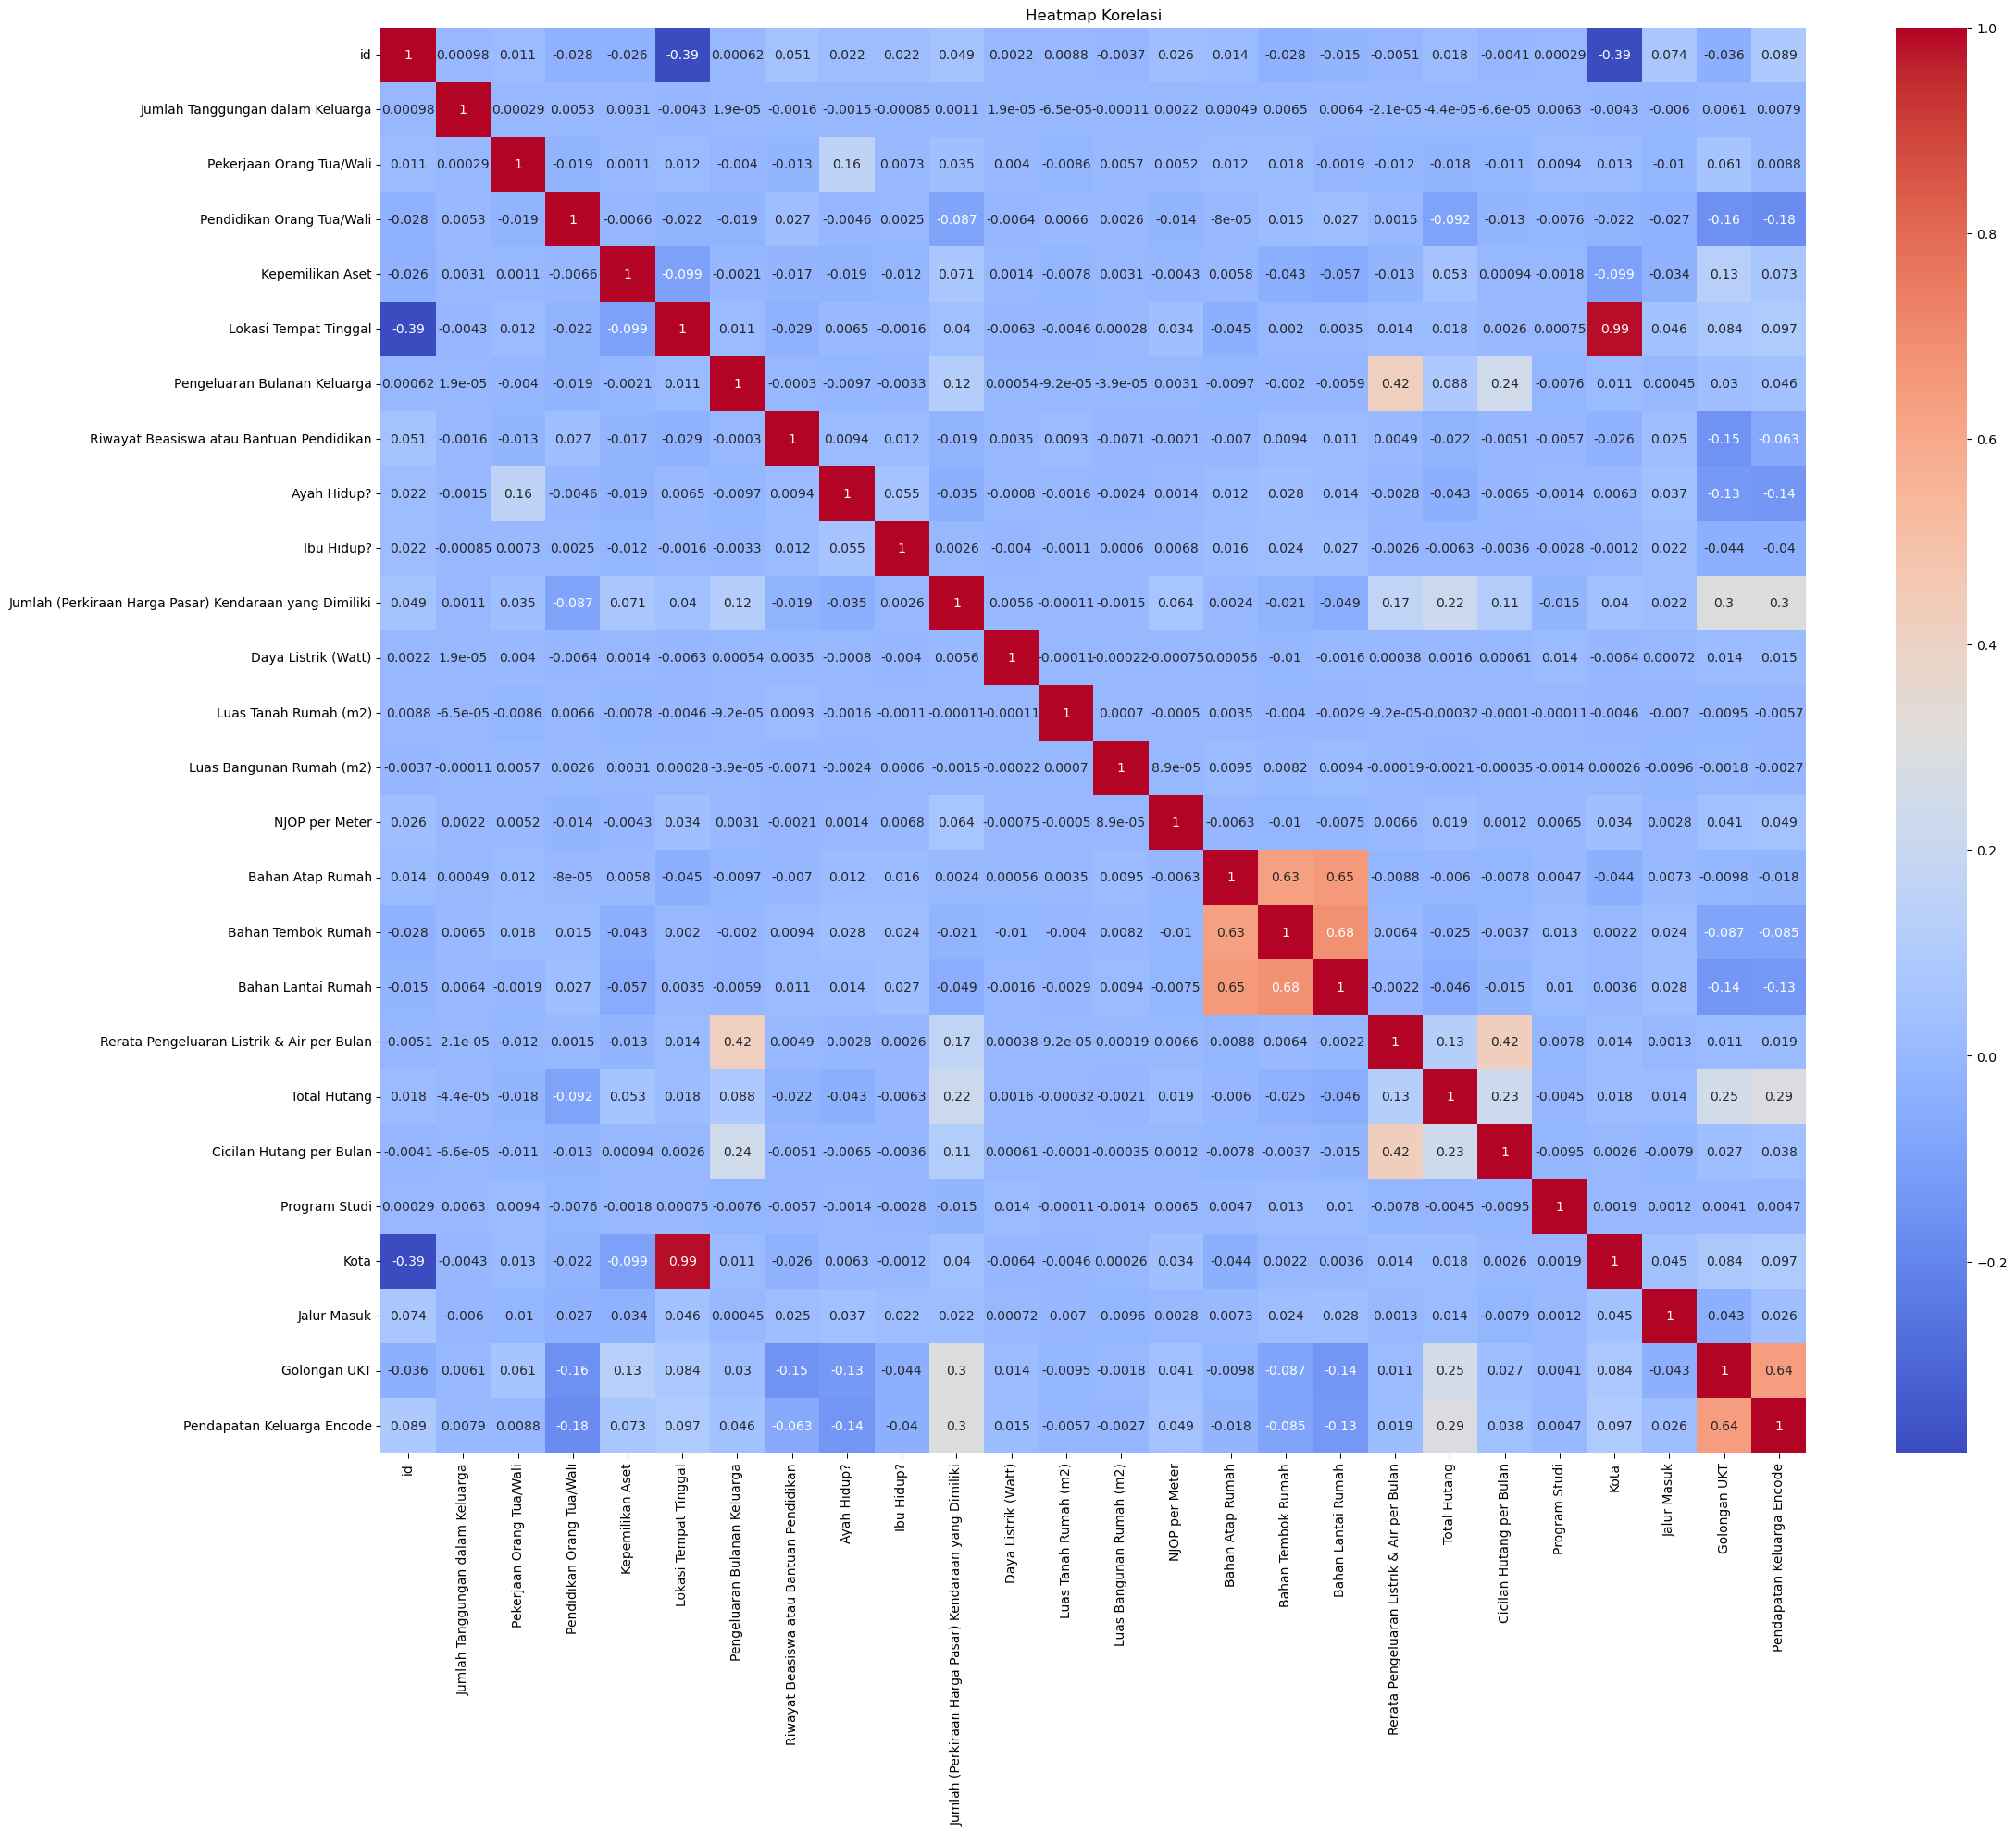

In [93]:
# Menghitung matriks korelasi
corr_matrix = df.corr()

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Heatmap Korelasi')
plt.show()

In [94]:
df_test = pd.read_csv("finalgemastik/test.csv")

In [95]:
df_test

,id,Pendapatan Keluarga,Jumlah Tanggungan dalam Keluarga,Pekerjaan Orang Tua/Wali,Pendidikan Orang Tua/Wali,Kepemilikan Aset,Lokasi Tempat Tinggal,Pengeluaran Bulanan Keluarga,Status Kepesertaan Program Bantuan Pemerintah,Riwayat Beasiswa atau Bantuan Pendidikan,Ayah Hidup?,Ibu Hidup?,Status Kepemilikan Tempat Tinggal,Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki,Daya Listrik (Watt),Luas Tanah Rumah (m2),Luas Bangunan Rumah (m2),NJOP per Meter,Bahan Atap Rumah,Bahan Tembok Rumah,Bahan Lantai Rumah,Rerata Pengeluaran Listrik & Air per Bulan,Total Hutang,Cicilan Hutang per Bulan,Program Studi,Kota,Jalur Masuk
0,80884,Rp 4.000.000 s.d. Rp 5.000.000,0.0,Buruh,SLTA Sederajat,Milik Sendiri,Kabupaten Sragen,2500000.0,KIS/JKS/BPJS,Tidak,Hidup,Hidup,Milik Sendiri,6000000.0,450.0,472.0,54.0,48000.0,genting tanah liat,batu bata,keramik,105000.0,0.0,0.0,Teknik Mesin,Kabupaten Sragen,SNBT
1,44867,lebih dari Rp 5.000.000,1.0,Pegawai Swasta,MA,Milik Sendiri,Kota Semarang,4000000.0,NaN,Tidak,Hidup,Hidup,Milik Sendiri,8000000.0,900.0,NaN,60.0,91510000.0,Genteng,Batu bata,Keramik,175000.0,30000000.0,1500000.0,Pendidikan Fisika,Kota Semarang,SNBT
2,110878,Rp 4.000.000 s.d. Rp 5.000.000,1.0,Petani,MI,Milik Sendiri,Kab. Pati,800000.0,KIS/JKS/BPJS,Tidak Ada,Hidup,Hidup,Milik Sendiri,25000000.0,1105.0,216.0,64.0,48000.0,Genteng dari tanah liat,tembok dari batu bata tanah liat,kramik,120000.0,0.0,0.0,Akuntansi,Kab. Pati,SNBT
3,146013,Rp 2.000.000 s.d. Rp 3.000.000,2.0,Buruh,SD,Milik Sendiri,Kab. Jepara,800000.0,KIS/JKS/BPJS,Tidak,Hidup,Hidup,Milik Sendiri,3.0,1300.0,1460.0,80.0,48000.0,Genteng Tanah liat,Semen,Keramik,260000.0,150000000.0,4000000.0,Pendidikan Bahasa dan Sastra Jawa,Kab. Jepara,SNBP
4,145148,Rp 2.000.000 s.d. Rp 3.000.000,1.0,Wiraswasta,SMP,Kontrak,Kota Bukittinggi,2500000.0,KIS/JKS/BPJS,kipk,Hidup,Hidup,Kontrak,1.0,900.0,72.0,72.0,0.0,SENG,KAYU,SEMEN ATAU LANTAI,NaN,0.0,0.0,Pendidikan Sejarah,Kota Bukittinggi,SNBP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7590,76559,Rp 2.000.000 s.d. Rp 3.000.000,0.0,Wiraswasta,SLTA Sederajat,Milik Sendiri,Kabupaten Sukoharjo,600000.0,KIS/JKS/BPJS,Tidak Dapat,Hidup,Hidup,Milik Sendiri,15000000.0,450.0,1084.0,0.0,64000.0,Genting tanah liat,Diplester dan dicat,Keramik,78355.0,0.0,0.0,Pendidikan Bahasa Inggris,Kabupaten Sukoharjo,SNBP
7591,145365,Rp 2.000.000 s.d. Rp 3.000.000,1.0,Buruh,MA,Menumpang,Kota Cirebon,1500000.0,KIS/JKS/BPJS,Tidak,Hidup,Meninggal,Menumpang,7000000.0,900.0,54.0,54.0,0.0,Genteng,NaN,Kramik Putih,300000.0,0.0,0.0,Teknik Komputer,Kota Cirebon,SNBP
7592,95826,lebih dari Rp 5.000.000,1.0,Pegawai Swasta,SMA,Milik Sendiri,Kabupaten Blora,2364000.0,KIS/JKS/BPJS,Tidak Dapat,Hidup,Hidup,Milik Sendiri,24000000.0,900.0,460.0,152.0,82000.0,Genting tanah liat,Kayu dan sebagian tembok,Kayu,80000.0,30240000.0,864000.0,Ilmu Politik,Kabupaten Blora,SNBT
7593,62466,lebih dari Rp 5.000.000,0.0,Tidak Bekerja,MTs,Menumpang,Kota Semarang,1500000.0,NaN,Tidak,Meninggal,Hidup,Menumpang,12500000.0,900.0,180.0,250.0,1416000.0,Seng dan Asbes,"Triplek, Kayu, Bata Semen",Keramik,250000.0,58200000.0,2500000.0,Gizi,Kota Semarang,SNBP


In [97]:
# Mengatur tampilan untuk menampilkan semua kolom
pd.set_option('display.max_columns', None)

# Menampilkan nama seluruh kolom
print(df_test.columns.tolist())

['id', 'Pendapatan Keluarga', 'Jumlah Tanggungan dalam Keluarga', 'Pekerjaan Orang Tua/Wali', 'Pendidikan Orang Tua/Wali', 'Kepemilikan Aset', 'Lokasi Tempat Tinggal', 'Pengeluaran Bulanan Keluarga', 'Status Kepesertaan Program Bantuan Pemerintah', 'Riwayat Beasiswa atau Bantuan Pendidikan', 'Ayah Hidup?', 'Ibu Hidup?', 'Status Kepemilikan Tempat Tinggal', 'Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki', 'Daya Listrik (Watt)', 'Luas Tanah Rumah (m2)', 'Luas Bangunan Rumah (m2)', 'NJOP per Meter', 'Bahan Atap Rumah', 'Bahan Tembok Rumah', 'Bahan Lantai Rumah', 'Rerata Pengeluaran Listrik & Air per Bulan', 'Total Hutang', 'Cicilan Hutang per Bulan', 'Program Studi', 'Kota', 'Jalur Masuk']


In [98]:
# Tentukan urutan ukuran secara manual
Pendapatan_Keluarga = {'kurang dari Rp 1.000.000,-': 1, 'Rp 1.000.000 s.d. Rp 2.000.000': 2, 'Rp 2.000.000 s.d. Rp 3.000.000': 3, 'Rp 3.000.000 s.d. Rp 4.000.000': 4, 'Rp 4.000.000 s.d. Rp 5.000.000': 5,  'lebih dari Rp 5.000.000': 6}

# Terapkan encoding berdasarkan urutan
df_test['Pendapatan Keluarga Encode'] = df_test['Pendapatan Keluarga'].map(Pendapatan_Keluarga)

In [100]:
df_test.drop(columns="Pendapatan Keluarga", inplace=True)

In [101]:
# Mengisi nilai hilang dengan modus kolom
df_test['Jumlah Tanggungan dalam Keluarga'] = df_test['Jumlah Tanggungan dalam Keluarga'].fillna(df_test['Jumlah Tanggungan dalam Keluarga'].mode()[0])
df_test['Pekerjaan Orang Tua/Wali'] = df_test['Pekerjaan Orang Tua/Wali'].fillna(df_test['Pekerjaan Orang Tua/Wali'].mode()[0])
df_test['Pendidikan Orang Tua/Wali'] = df_test['Pendidikan Orang Tua/Wali'].fillna(df_test['Pendidikan Orang Tua/Wali'].mode()[0])
df_test['Kepemilikan Aset'] = df_test['Kepemilikan Aset'].fillna(df_test['Kepemilikan Aset'].mode()[0])
df_test['Lokasi Tempat Tinggal'] = df_test['Lokasi Tempat Tinggal'].fillna(df_test['Lokasi Tempat Tinggal'].mode()[0])
df_test['Status Kepesertaan Program Bantuan Pemerintah'] = df_test['Status Kepesertaan Program Bantuan Pemerintah'].fillna(df_test['Status Kepesertaan Program Bantuan Pemerintah'].mode()[0])
df_test['Ayah Hidup?'] = df_test['Ayah Hidup?'].fillna(df_test['Ayah Hidup?'].mode()[0])
df_test['Ibu Hidup?'] = df_test['Ibu Hidup?'].fillna(df_test['Ibu Hidup?'].mode()[0])
df_test['Status Kepemilikan Tempat Tinggal'] = df_test['Status Kepemilikan Tempat Tinggal'].fillna(df_test['Status Kepemilikan Tempat Tinggal'].mode()[0])
df_test['Bahan Atap Rumah'] = df_test['Bahan Atap Rumah'].fillna(df_test['Bahan Atap Rumah'].mode()[0])
df_test['Bahan Tembok Rumah'] = df_test['Bahan Tembok Rumah'].fillna(df_test['Bahan Tembok Rumah'].mode()[0])
df_test['Bahan Lantai Rumah'] = df_test['Bahan Lantai Rumah'].fillna(df_test['Bahan Lantai Rumah'].mode()[0])
df_test['Program Studi'] = df_test['Program Studi'].fillna(df_test['Program Studi'].mode()[0])
df_test['Kota'] = df_test['Kota'].fillna(df_test['Kota'].mode()[0])
df_test['Jalur Masuk'] = df_test['Jalur Masuk'].fillna(df_test['Jalur Masuk'].mode()[0])
df_test['Pendapatan Keluarga Encode'] = df_test['Pendapatan Keluarga Encode'].fillna(df_test['Pendapatan Keluarga Encode'].mode()[0])

In [102]:
df_test['Pengeluaran Bulanan Keluarga'] = df_test['Pengeluaran Bulanan Keluarga'].fillna(df_test['Pengeluaran Bulanan Keluarga'].mean())
df_test['Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki'] = df_test['Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki'].fillna(df_test['Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki'].mean())
df_test['Daya Listrik (Watt)'] = df_test['Daya Listrik (Watt)'].fillna(df_test['Daya Listrik (Watt)'].mean())
df_test['Luas Tanah Rumah (m2)'] = df_test['Luas Tanah Rumah (m2)'].fillna(df_test['Luas Tanah Rumah (m2)'].mean())
df_test['Luas Bangunan Rumah (m2)'] = df_test['Luas Bangunan Rumah (m2)'].fillna(df_test['Luas Bangunan Rumah (m2)'].mean())
df_test['NJOP per Meter'] = df_test['NJOP per Meter'].fillna(df_test['NJOP per Meter'].mean())
df_test['Rerata Pengeluaran Listrik & Air per Bulan'] = df_test['Rerata Pengeluaran Listrik & Air per Bulan'].fillna(df_test['Rerata Pengeluaran Listrik & Air per Bulan'].mean())
df_test['Total Hutang'] = df_test['Total Hutang'].fillna(df_test['Total Hutang'].mean())
df_test['Cicilan Hutang per Bulan'] = df_test['Cicilan Hutang per Bulan'].fillna(df_test['Cicilan Hutang per Bulan'].mean())

In [104]:
df_test.drop(columns="Status Kepesertaan Program Bantuan Pemerintah", inplace=True)

In [106]:
df_test

,id,Jumlah Tanggungan dalam Keluarga,Pekerjaan Orang Tua/Wali,Pendidikan Orang Tua/Wali,Kepemilikan Aset,Lokasi Tempat Tinggal,Pengeluaran Bulanan Keluarga,Riwayat Beasiswa atau Bantuan Pendidikan,Ayah Hidup?,Ibu Hidup?,Status Kepemilikan Tempat Tinggal,Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki,Daya Listrik (Watt),Luas Tanah Rumah (m2),Luas Bangunan Rumah (m2),NJOP per Meter,Bahan Atap Rumah,Bahan Tembok Rumah,Bahan Lantai Rumah,Rerata Pengeluaran Listrik & Air per Bulan,Total Hutang,Cicilan Hutang per Bulan,Program Studi,Kota,Jalur Masuk,Pendapatan Keluarga Encode
0,80884,0.0,Buruh,SLTA Sederajat,Milik Sendiri,Kabupaten Sragen,2500000.0,Tidak,Hidup,Hidup,Milik Sendiri,6000000.0,450.0,472.000000,54.0,48000.0,genting tanah liat,batu bata,keramik,105000.000000,0.0,0.0,Teknik Mesin,Kabupaten Sragen,SNBT,5.0
1,44867,1.0,Pegawai Swasta,MA,Milik Sendiri,Kota Semarang,4000000.0,Tidak,Hidup,Hidup,Milik Sendiri,8000000.0,900.0,377.170974,60.0,91510000.0,Genteng,Batu bata,Keramik,175000.000000,30000000.0,1500000.0,Pendidikan Fisika,Kota Semarang,SNBT,6.0
2,110878,1.0,Petani,MI,Milik Sendiri,Kab. Pati,800000.0,Tidak Ada,Hidup,Hidup,Milik Sendiri,25000000.0,1105.0,216.000000,64.0,48000.0,Genteng dari tanah liat,tembok dari batu bata tanah liat,kramik,120000.000000,0.0,0.0,Akuntansi,Kab. Pati,SNBT,5.0
3,146013,2.0,Buruh,SD,Milik Sendiri,Kab. Jepara,800000.0,Tidak,Hidup,Hidup,Milik Sendiri,3.0,1300.0,1460.000000,80.0,48000.0,Genteng Tanah liat,Semen,Keramik,260000.000000,150000000.0,4000000.0,Pendidikan Bahasa dan Sastra Jawa,Kab. Jepara,SNBP,3.0
4,145148,1.0,Wiraswasta,SMP,Kontrak,Kota Bukittinggi,2500000.0,kipk,Hidup,Hidup,Kontrak,1.0,900.0,72.000000,72.0,0.0,SENG,KAYU,SEMEN ATAU LANTAI,219776.970401,0.0,0.0,Pendidikan Sejarah,Kota Bukittinggi,SNBP,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7590,76559,0.0,Wiraswasta,SLTA Sederajat,Milik Sendiri,Kabupaten Sukoharjo,600000.0,Tidak Dapat,Hidup,Hidup,Milik Sendiri,15000000.0,450.0,1084.000000,0.0,64000.0,Genting tanah liat,Diplester dan dicat,Keramik,78355.000000,0.0,0.0,Pendidikan Bahasa Inggris,Kabupaten Sukoharjo,SNBP,3.0
7591,145365,1.0,Buruh,MA,Menumpang,Kota Cirebon,1500000.0,Tidak,Hidup,Meninggal,Menumpang,7000000.0,900.0,54.000000,54.0,0.0,Genteng,Batu bata,Kramik Putih,300000.000000,0.0,0.0,Teknik Komputer,Kota Cirebon,SNBP,3.0
7592,95826,1.0,Pegawai Swasta,SMA,Milik Sendiri,Kabupaten Blora,2364000.0,Tidak Dapat,Hidup,Hidup,Milik Sendiri,24000000.0,900.0,460.000000,152.0,82000.0,Genting tanah liat,Kayu dan sebagian tembok,Kayu,80000.000000,30240000.0,864000.0,Ilmu Politik,Kabupaten Blora,SNBT,6.0
7593,62466,0.0,Tidak Bekerja,MTs,Menumpang,Kota Semarang,1500000.0,Tidak,Meninggal,Hidup,Menumpang,12500000.0,900.0,180.000000,250.0,1416000.0,Seng dan Asbes,"Triplek, Kayu, Bata Semen",Keramik,250000.000000,58200000.0,2500000.0,Gizi,Kota Semarang,SNBP,6.0


In [107]:
# Create a label encoder object
le = LabelEncoder()

# Iterate through the columns
for col in df_test:
    if df_test[col].dtype == 'object':
        # Train on the training data
        le.fit(df_test[col])
        # Transform the training data
        df_test[col] = le.transform(df_test[col])
        
print('All categorical columns were label encoded.')
df_test.head()

All categorical columns were label encoded.


,id,Jumlah Tanggungan dalam Keluarga,Pekerjaan Orang Tua/Wali,Pendidikan Orang Tua/Wali,Kepemilikan Aset,Lokasi Tempat Tinggal,Pengeluaran Bulanan Keluarga,Riwayat Beasiswa atau Bantuan Pendidikan,Ayah Hidup?,Ibu Hidup?,Status Kepemilikan Tempat Tinggal,Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki,Daya Listrik (Watt),Luas Tanah Rumah (m2),Luas Bangunan Rumah (m2),NJOP per Meter,Bahan Atap Rumah,Bahan Tembok Rumah,Bahan Lantai Rumah,Rerata Pengeluaran Listrik & Air per Bulan,Total Hutang,Cicilan Hutang per Bulan,Program Studi,Kota,Jalur Masuk,Pendapatan Keluarga Encode
0,80884,0.0,0,21,2,296,2500000.0,2,0,0,2,6000000.0,450.0,472.000000,54.0,48000.0,498,862,459,105000.000000,0.0,0.0,69,295,1,5.0
1,44867,1.0,3,6,2,409,4000000.0,2,0,0,2,8000000.0,900.0,377.170974,60.0,91510000.0,135,253,66,175000.000000,30000000.0,1500000.0,30,409,1,6.0
2,110878,1.0,4,7,2,94,800000.0,3,0,0,2,25000000.0,1105.0,216.000000,64.0,48000.0,176,1123,516,120000.000000,0.0,0.0,0,94,1,5.0
3,146013,2.0,0,18,2,41,800000.0,2,0,0,2,3.0,1300.0,1460.000000,80.0,48000.0,154,642,66,260000.000000,150000000.0,4000000.0,26,41,0,3.0
4,145148,1.0,6,25,0,346,2500000.0,5,0,0,0,1.0,900.0,72.000000,72.0,0.0,341,488,292,219776.970401,0.0,0.0,44,345,0,3.0


In [108]:
df_test.to_csv("finalgemastik/test_clean.csv", index=None)

In [109]:
df.columns

Index(['id', 'Jumlah Tanggungan dalam Keluarga', 'Pekerjaan Orang Tua/Wali',
       'Pendidikan Orang Tua/Wali', 'Kepemilikan Aset',
       'Lokasi Tempat Tinggal', 'Pengeluaran Bulanan Keluarga',
       'Riwayat Beasiswa atau Bantuan Pendidikan', 'Ayah Hidup?', 'Ibu Hidup?',
       'Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki',
       'Daya Listrik (Watt)', 'Luas Tanah Rumah (m2)',
       'Luas Bangunan Rumah (m2)', 'NJOP per Meter', 'Bahan Atap Rumah',
       'Bahan Tembok Rumah', 'Bahan Lantai Rumah',
       'Rerata Pengeluaran Listrik & Air per Bulan', 'Total Hutang',
       'Cicilan Hutang per Bulan', 'Program Studi', 'Kota', 'Jalur Masuk',
       'Golongan UKT', 'Pendapatan Keluarga Encode'],
      dtype='object')

In [120]:
df_test.columns

Index(['id', 'Jumlah Tanggungan dalam Keluarga', 'Pekerjaan Orang Tua/Wali',
       'Pendidikan Orang Tua/Wali', 'Kepemilikan Aset',
       'Lokasi Tempat Tinggal', 'Pengeluaran Bulanan Keluarga',
       'Riwayat Beasiswa atau Bantuan Pendidikan', 'Ayah Hidup?', 'Ibu Hidup?',
       'Jumlah (Perkiraan Harga Pasar) Kendaraan yang Dimiliki',
       'Daya Listrik (Watt)', 'Luas Tanah Rumah (m2)',
       'Luas Bangunan Rumah (m2)', 'NJOP per Meter', 'Bahan Atap Rumah',
       'Bahan Tembok Rumah', 'Bahan Lantai Rumah',
       'Rerata Pengeluaran Listrik & Air per Bulan', 'Total Hutang',
       'Cicilan Hutang per Bulan', 'Program Studi', 'Kota', 'Jalur Masuk',
       'Pendapatan Keluarga Encode'],
      dtype='object')

In [111]:
df_test.drop(columns="Status Kepemilikan Tempat Tinggal", inplace=True)

In [112]:
df_test.to_csv("finalgemastik/test_clean(2).csv", index=None)